In [1]:
from dirac import DataBase

In [2]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import healpy as hp

Start the Spark cluster with 32 executors and initialize database.

In [3]:
db = DataBase(conf={"spark.executor.instances" : 6})

Status,Pod Name,Message
Running,pyspark-1627674667-ctslater-spark-exec-1,Started container spark-kubernetes-executor
Running,pyspark-1627674667-ctslater-spark-exec-2,Started container spark-kubernetes-executor
Running,pyspark-1627674667-ctslater-spark-exec-3,Started container spark-kubernetes-executor
Running,pyspark-1627674667-ctslater-spark-exec-4,Started container spark-kubernetes-executor
Running,pyspark-1627674667-ctslater-spark-exec-5,Started container spark-kubernetes-executor
Running,pyspark-1627674667-ctslater-spark-exec-6,Started container spark-kubernetes-executor


Load the Gaia EDR3 data

In [4]:
import pyspark.sql.functions as sparkfunc

catalogs = db.get_catalogs()

gaia_ = catalogs.load("gaia_source_edr3")
gaia = gaia_.withColumn("hpix12",
                        sparkfunc.floor(gaia_['source_id']/34359738368))

Apply `healpix_hist` function to the Gaia data and time the function execution.

In [5]:
%%time

healpix_map = gaia.exclude_duplicates().healpix_hist(NSIDE=512)

CPU times: user 224 ms, sys: 114 ms, total: 338 ms
Wall time: 4min 41s


Plot the results!

In [6]:
matplotlib.rcParams['figure.dpi'] = 120
matplotlib.rcParams['figure.figsize'] = [8, 6]

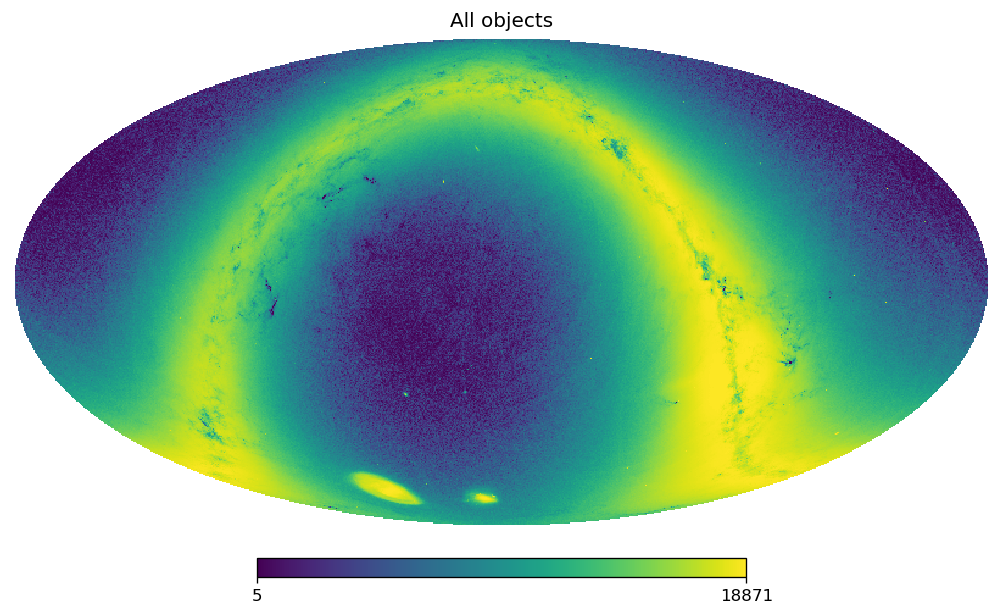

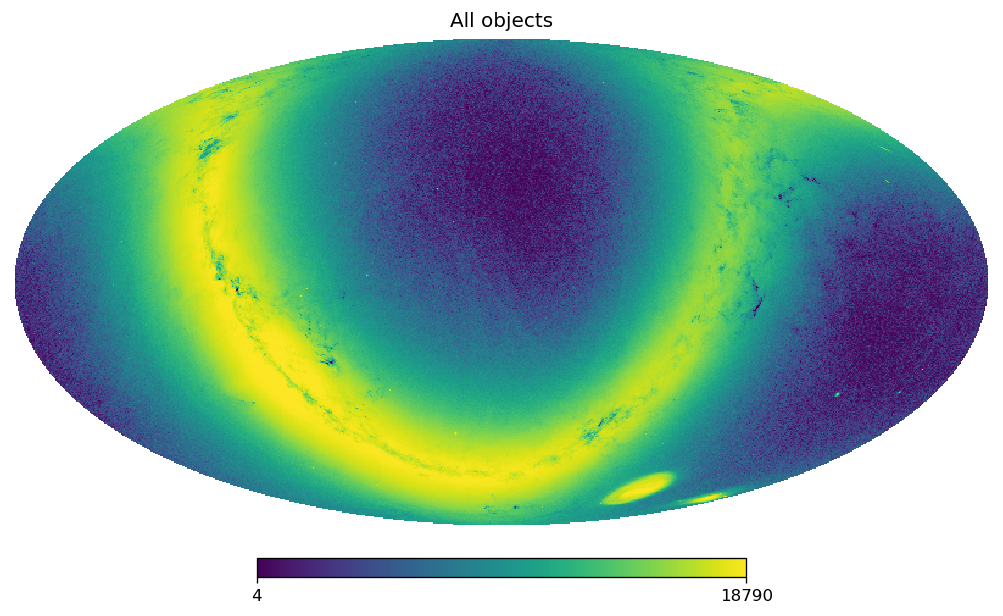

In [7]:
hp.mollview(healpix_map, title="All objects", rot=(0, 0, 0), nest=True, norm='hist')
plt.show()
hp.mollview(healpix_map, title="All objects", rot=(180, 0, 0), nest=True, norm='hist')